In [4]:
import sys
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets
from ultralytics import YOLO

In [30]:
import torchvision.transforms.functional as F

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
classNames = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 
    'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 
    'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
    'potted plant', 'bed', 'dining table', 'toilet', 'TV', 'laptop', 'mouse', 
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 
    'toothbrush'
]


In [8]:
cap =cv2.VideoCapture()

if not cap.isOpened:
    print("cam no")
    sys.exit()

model = YOLO("yolo11m.pt")

threshold = 0.5
tm = cv2.TickMeter()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    detection = model(frame, verbose = Flase)[0]
    tm.stop()
    fps = f"{1000/tm.getTimeMilli():.3f}fps"

    for data in detection.boxes.data.tolist():
        confidence = data[4]

        if  confidence > threshold:
            xmin, ymin, xmax, ymax = int(data[0]), int(data[1]), int(data[2]), int(data[3])
            label = int(data[5])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 255), 2)
            text = f"{classNames[label]}: {confidence*100:.2f}"
            cv2.putText(frame, text, (xmin, ymin-2), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv2.LINE_AA)
        cv2.putText(frame, fps, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1, cv2.LINE_AA)

        cv2.imshow('frame', frame)
        if cv2.waitKey(30)==27:
            break

    cap.release()
    cv2.destroyAllWindows()



In [13]:
#dir(models.detection)
# Faster RCNN
weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = models.detection.fasterrcnn_resnet50_fpn(weights = weights).to(device)

model.eval()

coco_labels_list = weights.meta["categories"]
coco_labels_list

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

In [20]:
color_array = np.random.randint(0, 256, (91, 3))
color_array  # person 이면 1번째 색상 갖고 옴

array([[240, 154,   1],
       [  3, 132, 120],
       [231, 137, 136],
       [ 15,  26, 211],
       [ 59, 193, 252],
       [  0, 109, 251],
       [239, 240,  14],
       [198, 241, 109],
       [132, 174,  93],
       [ 86, 246, 167],
       [104,  51, 119],
       [  7, 158,  28],
       [ 21,  68, 247],
       [118,  90,  24],
       [129, 248,  89],
       [ 25,  96, 108],
       [133,  92,  70],
       [182, 114, 237],
       [233, 103, 128],
       [176,  60, 176],
       [135, 157, 204],
       [122, 160, 134],
       [148, 103,  61],
       [132, 236,  89],
       [255,  72, 243],
       [228, 118, 183],
       [250, 223, 111],
       [219, 195, 100],
       [188, 145, 170],
       [226,  62,  82],
       [ 71,  60, 111],
       [195, 239,  82],
       [ 77, 154, 225],
       [111, 151, 181],
       [ 99, 207, 214],
       [ 26,  53, 228],
       [103,  56,   2],
       [ 79, 206,  35],
       [112, 128, 180],
       [158, 221, 234],
       [220, 113,  11],
       [249, 254

In [29]:
color_array = np.random.randint(0, 256, (91, 3))
[]

# demo 함수 선언
def visualize_detection_result(img_path, boxes, labels, scores):
    img = cv2.imread(img_path)

    for i in range(len(boxes)):
        x_min = int(boxes[i][0])
        y_min = int(boxes[i][1])
        x_max = int(boxes[i][2])
        y_max = int(boxes[i][3])

        color = tuple(map(int, color_array[labels[[i]]]))

        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)
        text = f"{coco_labels_list[labels[i]]}: {scores[i].item():.2f}"
        cv2.putText(img, text, (x_min, y_min+2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color,1, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()

def demo(img_path, threshold, weights, model):
    img = read_image(img_path)

    preprocess = weights.transforms()
    batch = preprocess(img).unsqueeze(0) # dimension을 확장 

    pred = model(batch)

    predict_dict = pred[0] # scores, boxes, labels

    indices = predict_dict["scores"] > threshold
    pred_boxes = predict_dict["boxes"][indices]
    pred_labels = predict_dict["labels"][indices]
    pred_scores = predict_dict["scores"][indices]

    visualize_detection_result(img_path, pred_boxes, pred_labels, pred_scores)

# demo 함수 호출

demo('./fig/fig/peoples.jpg', 0.5, weights, model)


In [34]:
img1_int = cv2.imread("./fig/fig/peoples.jpg")
img2_size = cv2.imread("./fig/fig/object_detection/dog_576x768.jpg")

h, w = img2_size.shape[:2]

resized_img = cv2.resize(img1_int, (w, h))
print(resized_img.shape) # 교수님 코드

# 크기 조정 (width=768, height=576)
# resized_img = cv2.resize(img1_int, (768, 576))

# # 결과 저장 또는 출력
# #cv2.imwrite('./fig/fig/object_detection/peoples_576_768.jpg', resized_img)
# cv2.imshow('Resized Image', resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

(576, 768, 3)


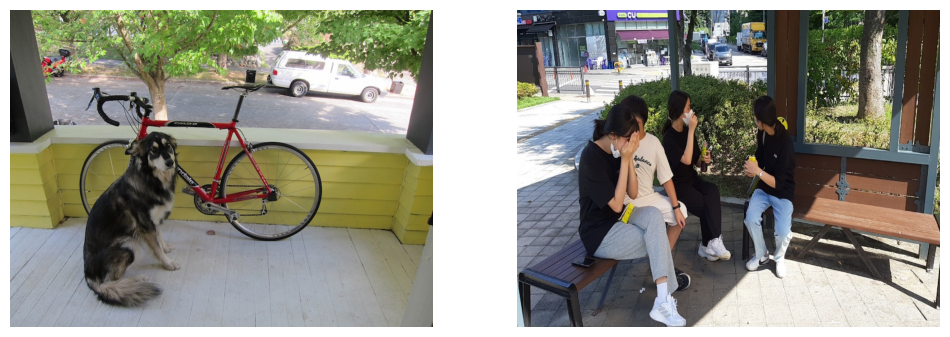

In [48]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols = len(imgs), figsize = (12, 6), squeeze= False) # 들어오는 이미지 개수만큼 쪼개라
    for i, img in enumerate(imgs):
        img = img.detach() # tensor type이기 때문에 
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img)) # 주소를 변경해줌
        axs[0, i].axis("off")
       

img1 = read_image("./fig/fig/object_detection/dog_576x768.jpg") #tensor로 읽음
img2 = read_image("./fig/fig/object_detection/peoples_576_768.jpg")

img_list = [img1,img2]

# print("img_list = \n", img_list)

# show 함수 호출
show(img_list)

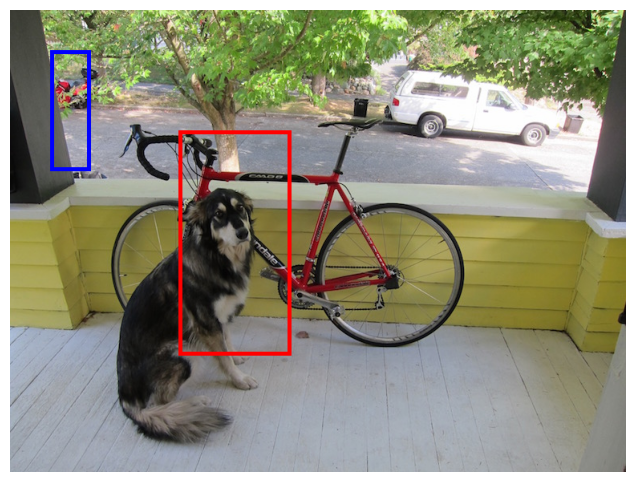

In [52]:
from torchvision.utils import draw_bounding_boxes

boxes = torch.tensor([[50, 50, 100, 200], [210, 150, 350, 430]])
colors = ["blue", "red"]
result = draw_bounding_boxes(img1, boxes, colors=colors, width=5)
show(result)

# result가 list로 나와서

In [63]:
pip install --upgrade torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [77]:


weights = models.segmentation.FCN_ResNet50_Weights.DEFAULT # 내려가면서 뽑는다. 피라미드
model = models.segmentation.fcn_resnet50(weights=weights).to(device)

model.eval()

transforms = weights.transforms() # transform을 거쳐서 
batch = torch.stack([transforms(i) for i in img_list]).to(device)

output = model(batch)["out"] #torch.Size([2, 21, 520, 693])
# [batch, class, ]

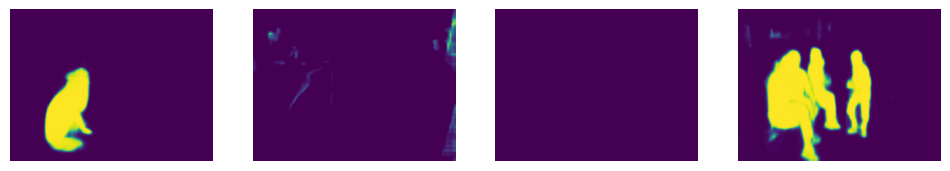

In [94]:
class_to_idx = {cls:idx for idx, cls in enumerate(weights.meta["categories"])}

normalized_mask = torch.nn.functional.softmax(output, dim=1) # feature value -> probability
# 확률 출력
dog_mask = [normalized_mask[img_idx, class_to_idx[cls]] 
            for img_idx in range(len(img_list)) 
            for cls in ("dog", "person")] # list로 만듦
show(dog_mask)

In [88]:
class_to_idx["dog"]

12

In [95]:
boolean_joint_mask = (normalized_mask.argmax(dim=1) == class_to_idx["dog"]) |\
                    (normalized_mask.argmax(dim=1) == class_to_idx["person"])

print(f"shape = {boolean_joint_mask.shape}, dtype = {boolean_joint_mask.dtype}")

shape = torch.Size([2, 520, 693]), dtype = torch.bool


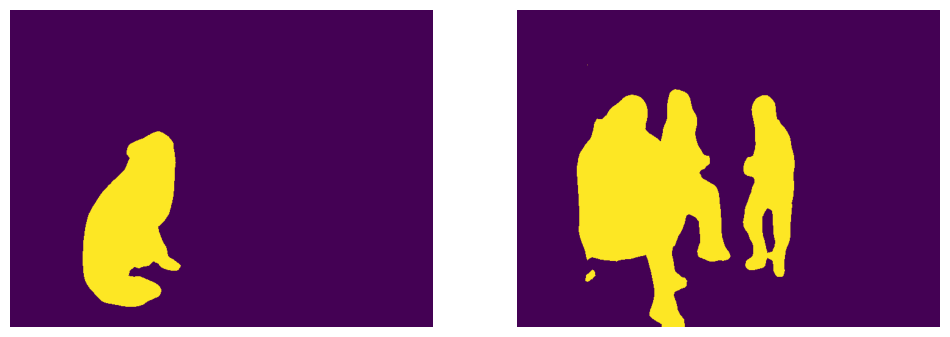

In [98]:
# show(boolean_joint_mask) # 처음엔 bool 타입이라 출력 못함

show([m.float() for m in boolean_joint_mask])

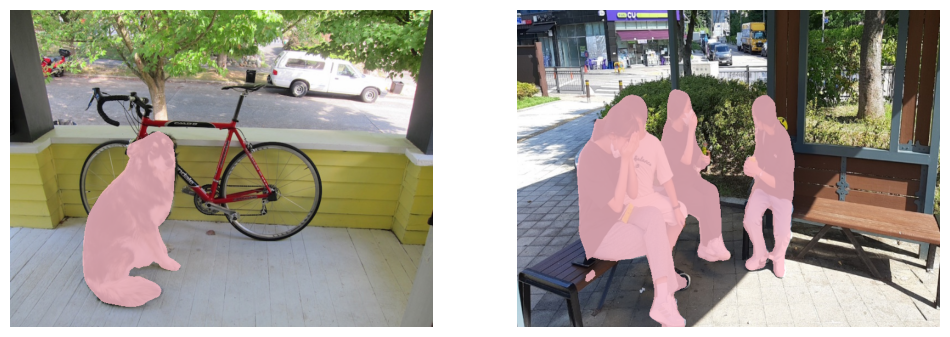

In [115]:
from torchvision.utils import draw_segmentation_masks # mask를 원본에 씌움


# img1 = read_image("./fig/fig/object_detection/dog_576x768.jpg") #tensor로 읽음
# img2 = read_image("./fig/fig/object_detection/peoples_576_768.jpg")

# img_list = [img1, img2]

img1 = cv2.imread("./fig/fig/object_detection/dog_576x768.jpg")
img1 = cv2.resize(img1, (693, 520))
img1_resize = cv2.imwrite("./fig/fig/object_detection/dog_resize.png", img1)


img2 = cv2.imread("./fig/fig/object_detection/peoples_576_768.jpg")
img2 = cv2.resize(img2, (693, 520))
img2_resize = cv2.imwrite("./fig/fig/object_detection/peoples_resize.png", img2)

img1 = read_image("./fig/fig/object_detection/dog_resize.png")
img2 = read_image("./fig/fig/object_detection/peoples_resize.png")

img_list = [img1, img2]

dog_person = [
    draw_segmentation_masks(img, mask, colors="pink")
    for img, mask in zip(img_list, boolean_joint_mask)

]

show(dog_person)